In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# thanks: http://bjodah.github.io/pyodesys/latest/pyodesys.html

import sympy as sp
import numpy as np

from pyodesys.symbolic import SymbolicSys
from pyodesys.util import stack_1d_on_left

import matplotlib.pyplot as plt


def numerical_solver(left, right, y0, params=[], params_value=[], tstart=0.,  tend=10., nt=50, plot=False,
         savetxt='None', savefig='None', integrator='scipy', dpi=100, kwargs='', verbose=False):
    ''' 
    Пояснение:
    y0 - начальные значения для переменных в виде строки 'X0,X1, ..., Xn' 
    tstart,  tend, nt - начало, конец и количество шагов по времени соответственно
    '''
    
    ''' 
    Zip группирует в соответствии левую и правую часть системы
    x, y = 'x', 'y'
    f = ['x**2 - y', 'y-y**3+x']
    list(zip([x,y], f))   ->   [('x', 'x**2 - y'), ('y', 'y-y**3+x')]
    '''
    odesys = SymbolicSys(zip(left, right), params=params, names=True)
    
    ''' Создаем точки по t'''
    tout = np.linspace(tstart, tend, nt)
    
    ''' Преобразуем начальные условия '''
    y0 = list(map(float, y0.split(',')))
    
    '''kwargs пока не нужен'''
    kwargs = dict(eval(kwargs) if kwargs else {})
    
    
    ''' Интегрируем '''
    xout, yout, info = odesys.integrate(tout, y0, params_value, integrator=integrator, **kwargs)
    
    
    if verbose:
        print(info)
    if savetxt != 'None':
        # stack_1d_on_left(xout, yout) -> [[t_0, x1_0, x2_0, x3_0], ... , [t_n, x1_n, x2_n, x3_n]]
        np.savetxt(savetxt, stack_1d_on_left(xout, yout))
    if plot:
        odesys.plot_result()
        plt.legend()
        if savefig != 'None':
            plt.savefig(savefig, dpi=dpi)
        else:
            plt.show()

ImportError: No module named 'pyodesys'

In [3]:
if __name__ == '__main__':
    p1, p2 = params = sp.symbols('p1, p2', real=True)
    params_value = [1., 10.]

    x , y, z = left = sp.symbols('x, y, z')
    right = [x - y - z*p2, x + y, 3*x*p1 + z]
    initial_conditions = '1, 1, 1'  # в строку конечно такое себе 

    numerical_solver(left=left, right=right, y0=initial_conditions, params=[p1, p2], params_value=params_value, 
                     savetxt='result.txt', plot=True)

NameError: name 'numerical_solver' is not defined

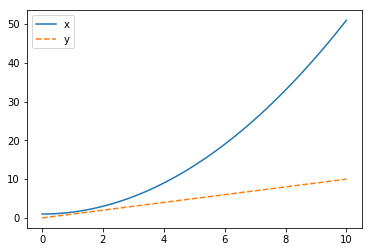

In [7]:
if __name__ == '__main__':
    p1, p2 = params = sp.symbols('p1, p2', real=True)
    params_value = [1., 10.]
    
    x , y = left = sp.symbols('x, y')
    right = [y, sin(t)]
    initial_conditions = '1, 0'  # в строку конечно такое себе 

    numerical_solver(left=left, right=right, y0=initial_conditions, params=[p1, p2], params_value=params_value, 
                     savetxt='result.txt', plot=True)